In [2]:
import pandas as pd
import numpy as np

results = pd.read_csv("results/PRBOvsPRSH_results.csv")
results = results.rename(columns={"env":"e","elapse":"v"})

In [3]:
results.head(5)

,e,profit1,profit2
0,0,1005.475,1270.250
1,0,1369.200,2371.050
2,0,1503.725,1863.625
3,0,1557.625,2438.500
4,0,1243.325,1728.250


In [4]:
results["e"] = results["e"].astype(str)
results["e"] = np.where(results["e"]=="0","Trend","Flat")

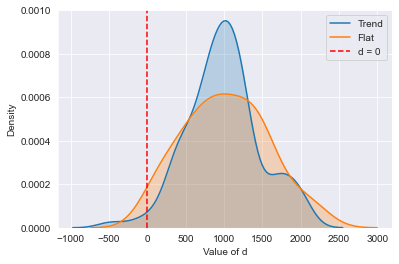

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

sns.kdeplot(results[results["e"]=="Trend"]["profit2"]-results[results["e"]=="Trend"]["profit1"],shade=True,gridsize=100,legend=True,label="Trend")
sns.kdeplot(results[results["e"]=="Flat"]["profit2"]-results[results["e"]=="Flat"]["profit1"],shade=True,gridsize=100,legend=True,label="Flat")
plt.axvline(x=0, linestyle='--', color='r', label='d = 0')

# Add legend and labels to the plot
plt.legend()
plt.xlabel('Value of d')
plt.ylabel('Density')

plt.legend()

In [6]:
import numpy as np
from scipy import stats

## Statistics for Flat Market

In [7]:
env = "Flat"

def ksTest(s):
	return stats.kstest(s, 'norm', (s.mean(), s.std())).pvalue

ksTest(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"])

0.984815775477728

In [8]:
import numpy as np
from scipy.stats import norm

def zTest(s,mu):
    var = s.var()*(s.shape[0]-1)/s.shape[0]
    n = s.shape[0]
    z = (s.mean()-mu)/np.sqrt(var/n)
    print(abs(z))
    p = 1 - norm.cdf(abs(z))
    return p

print(zTest(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"],0))

18.670150123134153
0.0


In [9]:
(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"]).mean()

1022.4354999999997

In [10]:
(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"]).std()

550.3899724352935

## Statistics for Trend Market

In [11]:
env = "Trend"

def ksTest(s):
	return stats.kstest(s, 'norm', (s.mean(), s.std())).pvalue

ksTest(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"])

0.4956914702403634

In [12]:
def zTest(s,mu):
    var = s.var()*(s.shape[0]-1)/s.shape[0]
    n = s.shape[0]
    z = (s.mean()-mu)/np.sqrt(var/n)
    print(abs(z))
    p = 1 - norm.cdf(abs(z))
    return p

print(zTest(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"],0))

21.04637956518784
0.0


In [13]:
(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"]).mean()

995.2040000000004

In [14]:
(results[results["e"]==env]["profit2"]-results[results["e"]==env]["profit1"]).std()

475.2445192766827